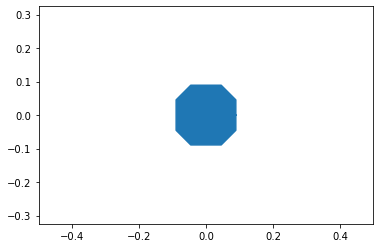

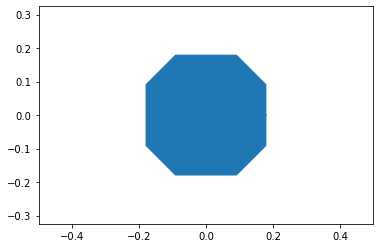

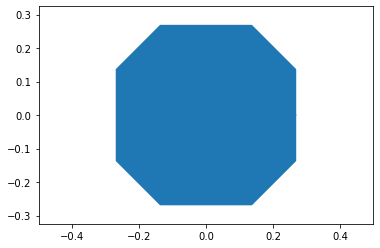

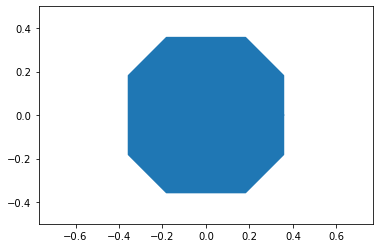

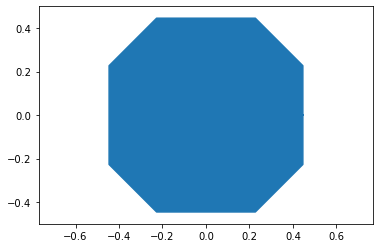

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math
import meep as mp
import cmath

shape_size = 48
sx, sy, sz = 1, 1, 4
h = 1.25
dpml = 0.5
b_m, c_m = 1.4, 3.54
res = 15
echo = 1000
cell_size = mp.Vector3(sx,sy,sz)
fcen = 0.5
df = 0.2
theta = math.radians(0)
nfreq = 200

# k with correct length (plane of incidence: XZ) 
k = mp.Vector3(math.sin(theta),0,math.cos(theta)).scale(fcen)
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * 2 * math.pi * k.dot(x + x0))
    return _pw_amp

coordinates = np.genfromtxt('../S4_code/data/DATA5_#5_sh.txt')
xc, yc = coordinates[:, 0], coordinates[:, 1]
size = len(xc) // shape_size
xc = np.reshape(xc, (size, shape_size))
yc = np.reshape(yc, (size, shape_size))    

for i in range(size):
    plt.axis('equal')
    plt.ylim(-0.5, 0.5)
    plt.xlim(-0.5, 0.5)
    plt.plot(xc[i], yc[i])
    plt.fill(xc[i], yc[i])
    plt.show()



In [7]:
def get_trans(vertices):
    geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
                mp.Prism(vertices, 
                         height=h, 
                         material=mp.Medium(index=c_m),
                         center=mp.Vector3()
                        )]
    pml_layers = [mp.PML(thickness=1, direction = mp.Z, side=mp.High),
                  mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
    src_pos = -(sz/2 - dpml - 0.5)
    src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                     component = mp.Ey,
                     center = mp.Vector3(0,0,src_pos),
                     size = mp.Vector3(sx,sy,0),
                     amp_func=pw_amp(k,mp.Vector3(0,0,src_pos)))]
    sim = mp.Simulation(resolution=res,
                        cell_size=cell_size,
                        boundary_layers=pml_layers,
                        sources=src,
                        geometry=geometry,
                        k_point=k)
    freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                         size = mp.Vector3(sx,sy,0))
    trans = sim.add_flux(fcen, df, nfreq, freg)
    sim.run(until = echo)
    bend = mp.get_fluxes(trans)
    
    #get straight
    sim.reset_meep()
    geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m))]
    pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
                  mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
    src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                     component = mp.Ey,
                     center = mp.Vector3(0,0,src_pos),
                     size = mp.Vector3(sx,sy,0),
                     amp_func=pw_amp(k,mp.Vector3(0,0,src_pos)))]
    sim = mp.Simulation(resolution=res,
                        cell_size=cell_size,
                        boundary_layers=pml_layers,
                        sources=src,
                        geometry=geometry,
                        k_point=k)
    freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                         size = mp.Vector3(sx,sy,0))
    trans = sim.add_flux(fcen, df, nfreq, freg)
    sim.run(until = echo)
    straight = mp.get_fluxes(trans)
    flux_freqs = mp.get_flux_freqs(trans)
    
    c = 300
    p = 0.6
    Ts = []
    for i in range(nfreq):
        Ts = np.append(Ts, bend[i]/straight[i])
    return np.multiply(flux_freqs, c/p),Ts

In [8]:
len(Ts)

NameError: name 'Ts' is not defined

In [3]:
data = [[], []]
coordinates = np.genfromtxt('../S4_code/data/DATA5_#5_sh.txt')
xc, yc = coordinates[:, 0], coordinates[:, 1]
size = len(xc) // shape_size
xc = np.reshape(xc, (size, shape_size))
yc = np.reshape(yc, (size, shape_size))

for i in range(size):
    # form shape
    vertices = [mp.Vector3(xc[i][0],yc[i][0])]
    for j in range(1, len(xc[i]) - 1):
        # eliminate duplicate point
        if xc[i][j] == xc[i][j - 1] and yc[i][j] == yc[i][j - 1]:
            continue
        vertices.append(mp.Vector3(xc[i][j], yc[i][j]))
    freq, Ts = get_trans(vertices)
    data[0].append(freq)
    data[1].append(Ts)

-----------
Initializing structure...
Meep: using complex fields.


KeyboardInterrupt: 

In [5]:
np.savetxt('data/DATA5.txt', data[1])

In [9]:
np.savetxt('data/SP_xaxis.txt', data[0][0])

IndexError: list index out of range

0


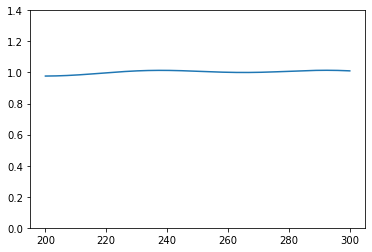

1


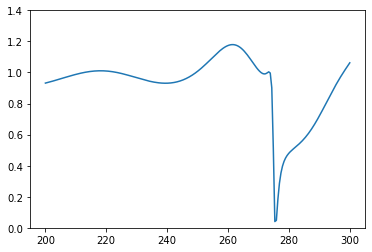

2


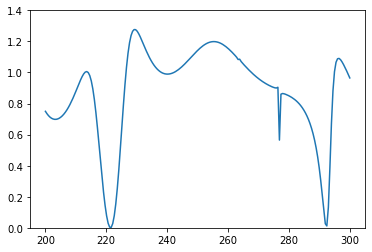

3


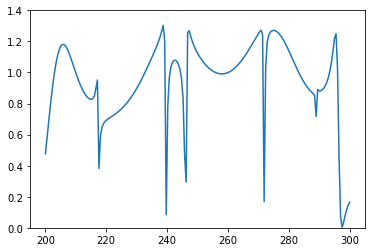

4


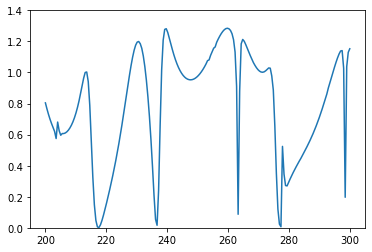

In [14]:
read = np.genfromtxt('data/DATA5_sp.txt')
x = np.genfromtxt('data/SP_xaxis.txt')
#read.shape
for i in range(size):
    print(i)
    plt.ylim(0, 1.4)
    plt.plot(x, read[i])
    plt.show()

0


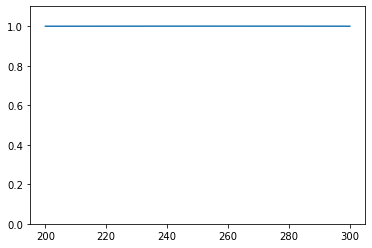

1


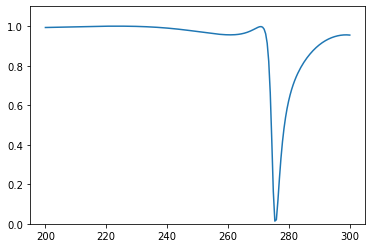

2


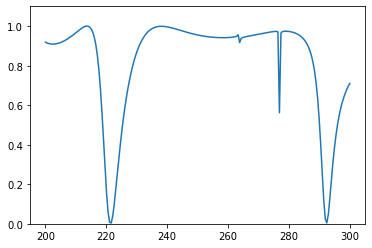

3


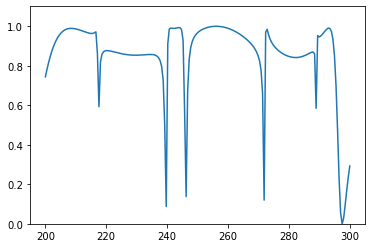

4


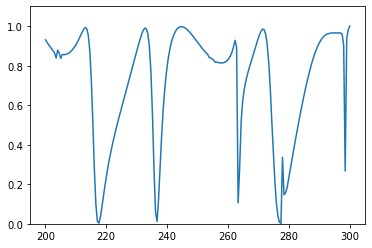

In [12]:
read = np.genfromtxt('data/DATA5_sp_aws.txt')
x = np.genfromtxt('data/SP_xaxis.txt')
#read.shape
for i in range(size):
    print(i)
    plt.ylim(0, 1.1)
    plt.plot(x, read[i])
    plt.show()

The 0th spectrum:


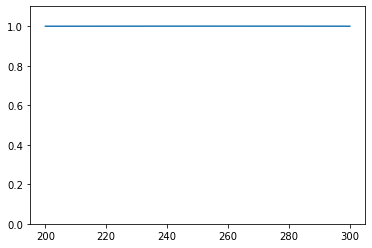

The 1th spectrum:


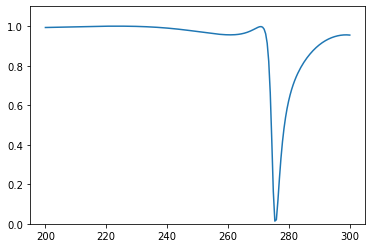

The 2th spectrum:


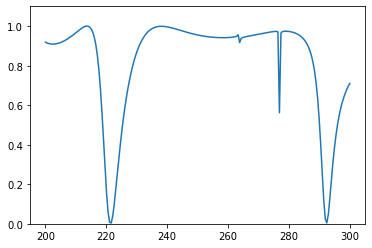

The 3th spectrum:


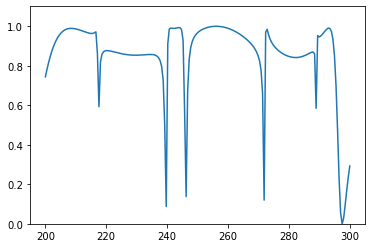

The 4th spectrum:


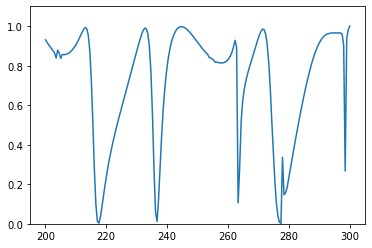

In [15]:
for i in range(len(data[0])):
    print('The '+str(i)+'th spectrum:')
    plt.ylim(0, 1.1)
    plt.plot(data[0][i], data[1][i])
    plt.show()

In [3]:
vertices = [mp.Vector3(xc[i][0],yc[i][0])]
for j in range(1, len(xc[i]) - 1):
    if xc[i][j] == xc[i][j - 1] and yc[i][j] == yc[i][j - 1]:
        continue
    vertices.append(mp.Vector3(xc[i][j], yc[i][j]))

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 17.233333333333334/1000.0 = 1.7% done in 4.0s, 228.4s to go
Meep progress: 35.46666666666667/1000.0 = 3.5% done in 8.0s, 217.7s to go
Meep progress: 53.9/1000.0 = 5.4% done in 12.0s, 210.9s to go
Meep progress: 72.43333333333334/1000.0 = 7.2% done in 16.0s, 205.1s to go
Meep progress: 87.26666666666667/1000.0 = 8.7% done in 20.0s, 209.4s to go
Meep progress: 103.06666666666666/1000.0 = 10.3% done in 24.0s, 209.1s to go
Meep progress: 118.36666666666666/1000.0 = 11.8% done in 28.0s, 208.8s to go
Meep progress: 135.43333333333334/1000.0 = 13.5% done in 32.0s, 204.5s to go
Meep progress: 149.2/1000.0 = 14.9% done in 36.0s, 205.5s to go
Meep progress: 165.96666666666667/1000.0 = 16.6% done in 40.0s, 201.2s to go
Meep progress: 183.16666666666666/1000.0 = 18.3% done in 44.0s, 196.4s to go
Meep progress: 199.0/1000.0 = 19.9% done in 48.0s, 193.4s to go
Meep progress: 216.4/1000.0 = 21.6% done in 52.1s, 188.5s to

Meep progress: 982.1666666666666/1000.0 = 98.2% done in 216.2s, 3.9s to go
run 0 finished at t = 1000.0 (30000 timesteps)


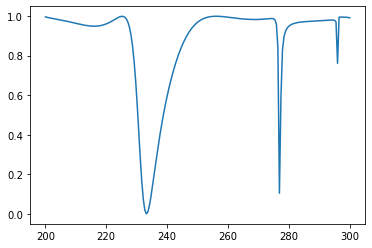

In [5]:
get_trans(vertices)

In [7]:
geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
            mp.Prism(vertices, 
                     height=h, 
                     material=mp.Medium(index=c_m),
                     center=mp.Vector3()
                    )]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]

src_pos = -(sz/2 - dpml - 0.5)
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]

sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )

freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )

trans = sim.add_flux(fcen, df, nfreq, freg)

In [8]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

-----------
Initializing structure...
Meep: using complex fields.


In [9]:
sim.run(until = echo)
bend = mp.get_fluxes(trans)

Meep progress: 17.4/1000.0 = 1.7% done in 4.0s, 226.0s to go
Meep progress: 35.0/1000.0 = 3.5% done in 8.0s, 220.8s to go
Meep progress: 52.86666666666667/1000.0 = 5.3% done in 12.0s, 215.2s to go
Meep progress: 71.6/1000.0 = 7.2% done in 16.0s, 207.7s to go
Meep progress: 89.8/1000.0 = 9.0% done in 20.0s, 202.9s to go
Meep progress: 107.89999999999999/1000.0 = 10.8% done in 24.0s, 198.6s to go
Meep progress: 126.33333333333333/1000.0 = 12.6% done in 28.0s, 193.8s to go
Meep progress: 144.66666666666666/1000.0 = 14.5% done in 32.0s, 189.4s to go
Meep progress: 163.36666666666667/1000.0 = 16.3% done in 36.0s, 184.6s to go
Meep progress: 181.53333333333333/1000.0 = 18.2% done in 40.0s, 180.5s to go
Meep progress: 199.76666666666665/1000.0 = 20.0% done in 44.0s, 176.5s to go
Meep progress: 217.9/1000.0 = 21.8% done in 48.1s, 172.5s to go
Meep progress: 235.79999999999998/1000.0 = 23.6% done in 52.1s, 168.7s to go
Meep progress: 254.0/1000.0 = 25.4% done in 56.1s, 164.6s to go
Meep progres

In [10]:
sim.reset_meep()

geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )
freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )
trans = sim.add_flux(fcen, df, nfreq, freg)

In [11]:
sim.run(until = echo)
straight = mp.get_fluxes(trans)
flux_freqs = mp.get_flux_freqs(trans)

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 17.2/1000.0 = 1.7% done in 4.0s, 228.7s to go
Meep progress: 35.4/1000.0 = 3.5% done in 8.0s, 218.1s to go
Meep progress: 51.13333333333333/1000.0 = 5.1% done in 12.0s, 222.9s to go
Meep progress: 66.4/1000.0 = 6.6% done in 16.0s, 225.2s to go
Meep progress: 83.86666666666666/1000.0 = 8.4% done in 20.0s, 218.7s to go
Meep progress: 101.33333333333333/1000.0 = 10.1% done in 24.0s, 213.0s to go
Meep progress: 116.83333333333333/1000.0 = 11.7% done in 28.0s, 211.8s to go
Meep progress: 134.56666666666666/1000.0 = 13.5% done in 32.0s, 206.0s to go
Meep progress: 153.13333333333333/1000.0 = 15.3% done in 36.0s, 199.2s to go
Meep progress: 171.5/1000.0 = 17.1% done in 40.0s, 193.4s to go
Meep progress: 190.03333333333333/1000.0 = 19.0% done in 44.0s, 187.7s to go
Meep progress: 208.63333333333333/1000.0 = 20.9% done in 48.0s, 182.2s to go
Meep progress: 224.86666666666667/1000.0 = 22.5% done in 52.0s, 179.4s to 

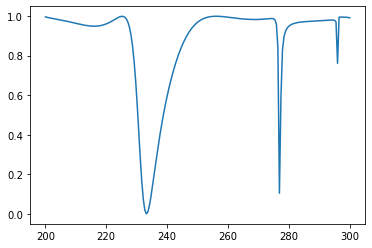

In [16]:
import matplotlib.pyplot as plt
c = 300
p = 0.6
Ts = []
wl = []
for i in range(nfreq):
    wl = np.append(wl, flux_freqs[i])
    Ts = np.append(Ts, bend[i]/straight[i])
plt.figure()
#plt.ylim(0,1)
plt.plot(np.multiply(flux_freqs, c/p),Ts)

In [13]:
len(Ts)

200

In [14]:
Ts

array([9.95733607e-01, 9.93826593e-01, 9.92037552e-01, 9.90352369e-01,
       9.88754135e-01, 9.87224290e-01, 9.85743640e-01, 9.84293231e-01,
       9.82855090e-01, 9.81412839e-01, 9.79952186e-01, 9.78461315e-01,
       9.76931155e-01, 9.75355579e-01, 9.73731509e-01, 9.72058951e-01,
       9.70340974e-01, 9.68583640e-01, 9.66795882e-01, 9.64989357e-01,
       9.63178275e-01, 9.61379199e-01, 9.59610840e-01, 9.57893838e-01,
       9.56250541e-01, 9.54704778e-01, 9.53281631e-01, 9.52007208e-01,
       9.50908405e-01, 9.50012670e-01, 9.49347745e-01, 9.48941394e-01,
       9.48821092e-01, 9.49013663e-01, 9.49544856e-01, 9.50438810e-01,
       9.51717381e-01, 9.53399272e-01, 9.55498904e-01, 9.58024906e-01,
       9.60978112e-01, 9.64348861e-01, 9.68113351e-01, 9.72228677e-01,
       9.76626070e-01, 9.81201622e-01, 9.85803553e-01, 9.90214683e-01,
       9.94128309e-01, 9.97115123e-01, 9.98578178e-01, 9.97692555e-01,
       9.93326803e-01, 9.83945989e-01, 9.67504063e-01, 9.41351864e-01,
      